# EEG data from basic sensory task in Schizophrenia

Authors: Karl Jääts, Mihkel Kruusi, Siim K. Koger

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

In [2]:
demo = pd.read_csv("data/demographic.csv")
# demographic.csv columns have space as a first character.. remove it!
demo.columns = [col.replace(' ', '') for col in demo.columns]
erp_data = pd.read_csv("data/ERPdata.csv")

ERP = erp_data.merge(demo, on='subject')

ERP.group.replace(to_replace={0: 'Control', 1: 'Schizo'}, inplace=True)
ERP = ERP.drop(ERP.columns[5:11], axis=1)

### Baseline correction

In [3]:
ERP = ERP[(ERP.time_ms >= -100) & (ERP.time_ms <= 300)].groupby(['group', 'condition', 'time_ms']).mean()

### Preparing data

In [4]:
display(ERP[:3])
ERP.loc[(slice(None),1), ['Fz', 'FCz', 'Cz']] = ERP.loc[(slice(None),1), ['Fz', 'FCz', 'Cz']] - ERP.loc[(slice(None),3), ['Fz', 'FCz', 'Cz']].values
ERP = ERP.drop(index=3, level=1)
ERP.reset_index()
display(ERP[:3])

subject        Fz       FCz        Cz     age  \
group   condition time_ms                                                   
Control 1         -99.6094     25.0  0.455273  0.431357  0.139358  38.375   
                  -98.6328     25.0  0.435204  0.423137  0.108364  38.375   
                  -97.6563     25.0  0.466328  0.454093  0.132008  38.375   

                            education  
group   condition time_ms              
Control 1         -99.6094  15.921875  
                  -98.6328  15.921875  
                  -97.6563  15.921875

subject        Fz       FCz        Cz     age  \
group   condition time_ms                                                   
Control 1         -99.6094     25.0 -0.106914 -0.161320 -0.120676  38.375   
                  -98.6328     25.0 -0.135403 -0.165145 -0.168089  38.375   
                  -97.6563     25.0 -0.083589 -0.105603 -0.120451  38.375   

                            education  
group   condition time_ms              
Control 1         -99.6094  15.921875  
                  -98.6328  15.921875  
                  -97.6563  15.921875

In [5]:
ERP=ERP.reset_index()
ERP = pd.melt(ERP, id_vars=['group', 'condition', 'time_ms'], value_vars=['Fz', 'FCz', 'Cz'])
ERP.condition.replace(to_replace={1: 'Button tone', 2: 'Playback'}, inplace=True)
ERP.head()

,group,condition,time_ms,variable,value
0,Control,Button tone,-99.6094,Fz,-0.106914
1,Control,Button tone,-98.6328,Fz,-0.135403
2,Control,Button tone,-97.6563,Fz,-0.083589
3,Control,Button tone,-96.6797,Fz,-0.056245
4,Control,Button tone,-95.7031,Fz,-0.012324


In [6]:
# It was mentioned that on average Schizophrenia patients have lower level of
# education. Here we can see that gender and ages are quite similar between two groups
# but education is really a bit lower when it comes to Schizophrenia patients.

dummy_demo = demo.copy()
dummy_demo.group.replace(to_replace={0: 'Control', 1: 'Schizo'}, inplace=True)

gender_frame = pd.DataFrame(data={'gender': dummy_demo.gender, 'group': dummy_demo.group})
display(gender_frame.groupby(['gender','group']).size())
print('\n _____________________________ \n')

print('Control subjects')
age_edu_frame = pd.DataFrame(data={'education': dummy_demo.education, 'group': dummy_demo.group, 'age': dummy_demo.age})
display(age_edu_frame[dummy_demo.group=='Control'].describe())

print('Schizophrenia patients')
age_edu_frame = pd.DataFrame(data={'education': dummy_demo.education, 'group': dummy_demo.group, 'age': dummy_demo.age})
display(age_edu_frame[dummy_demo.group=='Schizo'].describe())

gender  group  
 F      Control     6
        Schizo      8
 M      Control    26
        Schizo     41
dtype: int64


 _____________________________ 

Control subjects


,education,age
count,32.000000,32.000000
mean,15.921875,38.375000
std,1.959713,13.918542
min,12.000000,22.000000
25%,15.000000,24.750000
50%,16.000000,38.500000
75%,17.000000,52.250000
max,19.000000,63.000000


Schizophrenia patients


,education,age
count,49.00000,49.000000
mean,13.55102,40.020408
std,1.95588,13.483771
min,9.00000,19.000000
25%,12.00000,27.000000
50%,13.00000,41.000000
75%,16.00000,50.000000
max,16.00000,63.000000


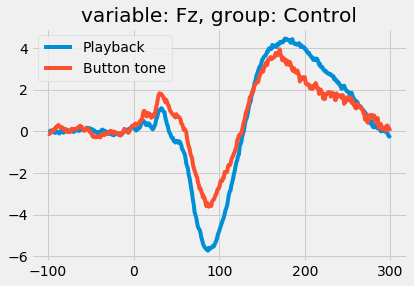

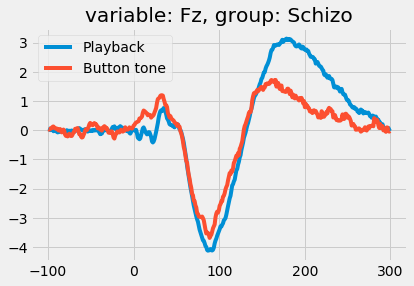

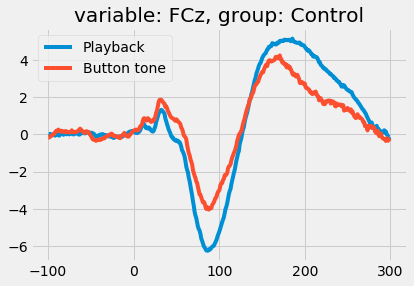

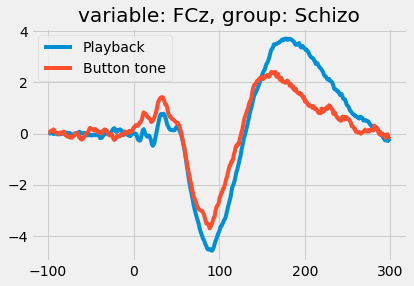

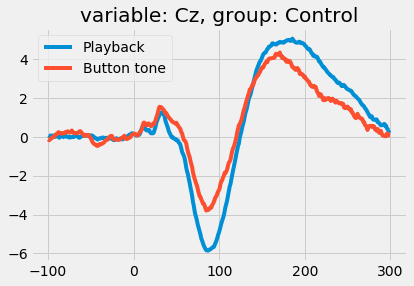

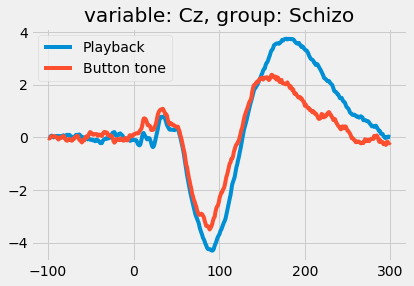

In [7]:
plt.style.use('fivethirtyeight')
ERP['variable'].unique()
PB=ERP[ERP['condition']=='Playback']
BT=ERP[ERP['condition']=='Button tone']
for v in ERP['variable'].unique():
    for g in ERP['group'].unique():
        cond = {'variable': v, 'group': g}
        PBc = PB.loc[(PB['variable'] == cond['variable']) & (PB['group'] == cond['group']), ['time_ms','value']]
        BTc = BT.loc[(BT['variable'] == cond['variable']) & (BT['group'] == cond['group']), ['time_ms','value']]
        plt.figure()
        plt.plot(PBc['time_ms'], PBc['value'])
        plt.plot(BTc['time_ms'], BTc['value'])
        plt.title('variable: {variable}, group: {group}'.format(**cond))
        plt.legend(['Playback','Button tone'])

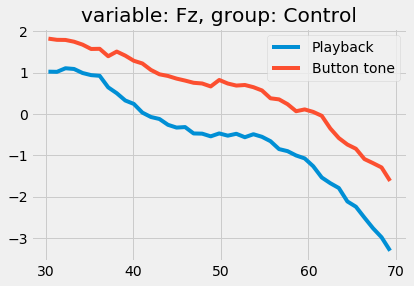

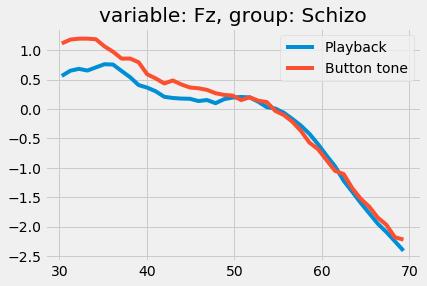

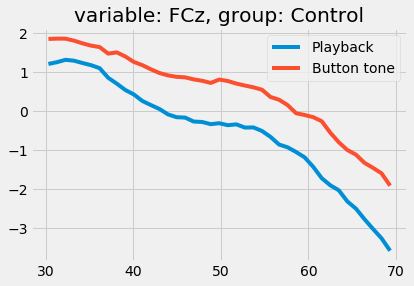

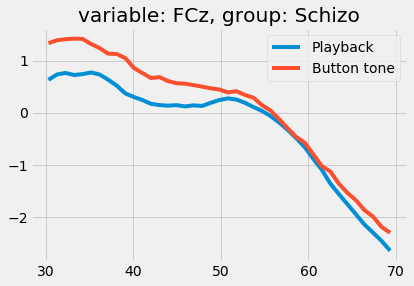

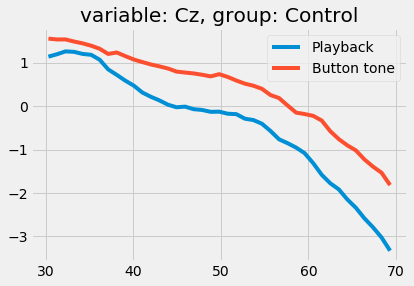

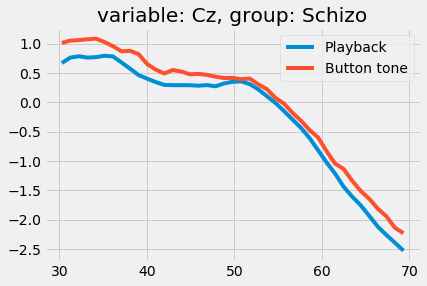

In [64]:
plt.style.use('fivethirtyeight')
ERP['variable'].unique()
ERP = ERP[(ERP.time_ms >= 30) & (ERP.time_ms <= 70)]
PB=ERP[ERP['condition']=='Playback']
BT=ERP[ERP['condition']=='Button tone']
for v in ERP['variable'].unique():
    for g in ERP['group'].unique():
        cond = {'variable': v, 'group': g}
        PBc = PB.loc[(PB['variable'] == cond['variable']) & (PB['group'] == cond['group']), ['time_ms','value']]
        BTc = BT.loc[(BT['variable'] == cond['variable']) & (BT['group'] == cond['group']), ['time_ms','value']]
        plt.figure()
        plt.plot(PBc['time_ms'], PBc['value'])
        plt.plot(BTc['time_ms'], BTc['value'])
        plt.title('variable: {variable}, group: {group}'.format(**cond))
        plt.legend(['Playback','Button tone'])

In [8]:
# Both N100 and P200 are of lower amplitude for Schizophrenia patients compared to controls.
# This seems to correspond to a discovery made by the same authors in a different study https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5008052/
# What they suggested based on their own and other research is that the patients with apathy may allocate too few
# resources to processing external (auditory) events and too many resources to internal events.


# During the button tone the N100 responses are actually very similar between both groups. 
# What differs though is the playback amplitude.
# It can be clearly seen that for the control subjects there is a suppression at N1 comparing playback and button sound.
# What's interesting though is that the difference comes from higher amplitude of N1 during playback not a higher suppression of N1 durin button press.
# From that I'd say that it's not that the patients don't suppress the signal during button press, rather it's that
# during passive listening they don't allocate as much resources to processing than control subjects (as was also found in the research above).
# That means that Schizophrenia patients constantly focus more to themselves but control subjects normally also focus on external world.

# Now, this result repeats the conclusion that Schizophrenia patients 

,subject,condition,FC4,C4,CP4,FC3,C3,CP3,group,gender,age,education
0,1,Button tone,-1.754095,-1.411906,-1.713631,-3.623855,-2.864079,-2.796495,Control,M,44,16.0
1,1,Control press,-1.927416,-1.311639,-2.030604,-2.376894,-3.119468,-2.909333,Control,M,44,16.0
2,2,Button tone,-0.676889,-0.232035,-0.514371,-1.231047,-1.141242,-0.607670,Control,M,39,17.0
3,2,Control press,0.391040,0.856605,0.579452,0.733641,0.824525,0.992221,Control,M,39,17.0


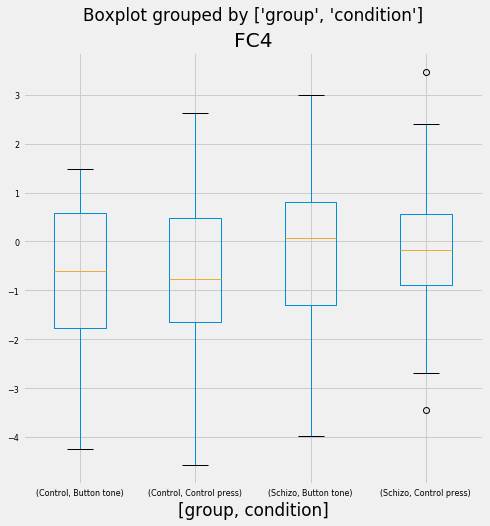

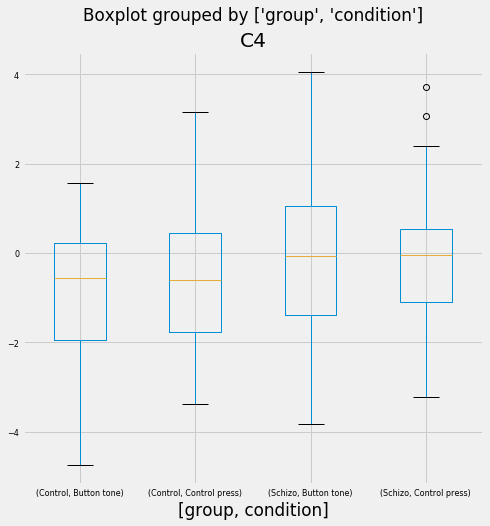

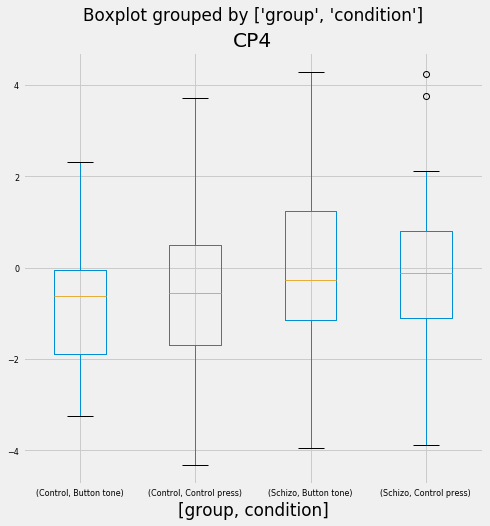

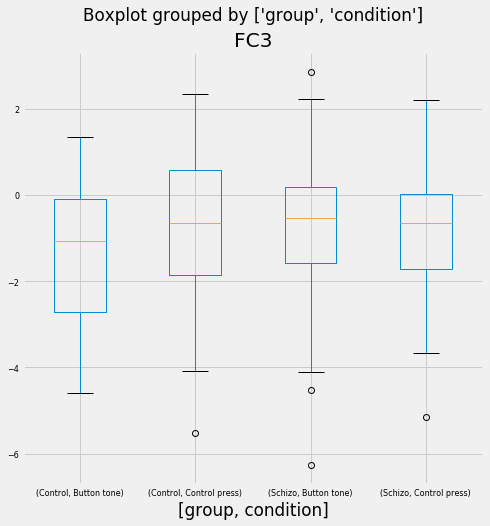

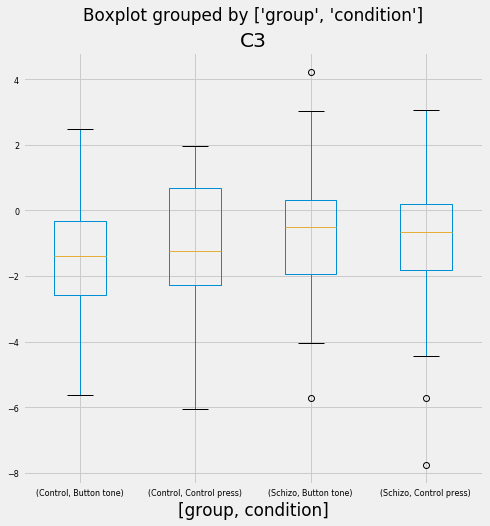

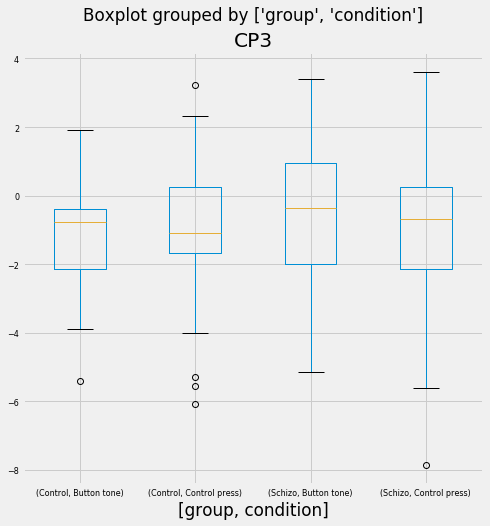

In [10]:
#####################
### LRP amplitude ###
#####################


# Electrodes
elec_right = ['FC4', 'C4', 'CP4']
elec_left = ['FC3', 'C3', 'CP3']
electrodes_lrp = elec_right + elec_left

# Substract baseline
BL = erp_data[(erp_data.time_ms >= -600) & (erp_data.time_ms <= -500)].groupby(['subject', 'condition']).mean()
RPamps = erp_data[(erp_data.time_ms >= -100) & (erp_data.time_ms <= 0)].groupby(['subject', 'condition']).mean()
RPamps = RPamps[electrodes_lrp] - BL[electrodes_lrp]

# Drop playback (won't need it here)
RPamps = RPamps.drop(index=2, level=1)
RPamps = RPamps.reset_index()

# Give proper names to group and condition values
RPamps_demo = RPamps.merge(demo, on='subject')
RPamps_demo.group.replace(to_replace={0: 'Control', 1: 'Schizo'}, inplace=True)
RPamps_demo.condition.replace(to_replace={1: 'Button tone', 3: 'Control press'}, inplace=True)

# Display for testing
display(RPamps_demo[:4])

# Boxplot
for el in electrodes_lrp:
    RPamps_demo.boxplot(column=el, by=['group', 'condition'], figsize=(8, 8), fontsize=8)

,group,condition,variable,value
0,Control,Button tone,FC4,-1.754095
1,Control,Control press,FC4,-1.927416
2,Control,Button tone,FC4,-0.676889
3,Control,Control press,FC4,0.391040
4,Control,Button tone,FC4,-4.243524
5,Control,Control press,FC4,0.759739
6,Control,Button tone,FC4,-1.434151
7,Control,Control press,FC4,-1.090816
8,Control,Button tone,FC4,-0.823886
9,Control,Control press,FC4,-3.031956


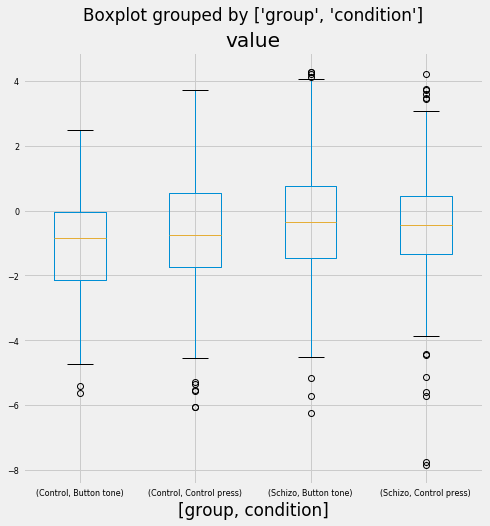

In [11]:
# For a single plot of values from every electrode amongst ['FC4', 'C4', 'CP4', 'FC3', 'C3', 'CP3']
RPamps_demo_hem = RPamps_demo.copy()
RPamps_demo_hem = pd.melt(RPamps_demo_hem, id_vars=['group', 'condition'], value_vars=electrodes_lrp)
display(RPamps_demo_hem[:10])

# Boxplot
RPamps_demo_hem.boxplot(column='value', by=['group', 'condition'], figsize=(8, 8), fontsize=8)

In [12]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

#python -m pip install statsmodels
#python -m pip install scipy
#python -m pop install researchpy
# after installing statsmodels jupyter kernel wants a restart !

In [57]:
df = RPamps_demo.copy()

#convert electrode columns to rows with labels:
df = pd.melt(df, id_vars=['subject', 'group', 'condition'], value_vars=electrodes_lrp, var_name='electrode', value_name='RP')
#Add the hemisphere column
df['hemisphere'] = df['electrode']
df['hemisphere'] = df['hemisphere'].apply(lambda x: 'left' if '3' in x else 'right')
#Remove the numbers from the electrodes
df['electrode'] = df['electrode'].str[:-1]


print('Right, left together: ')
result = stats.f_oneway(
    df['RP'][df['condition'] == 'Button tone'][df['group'] == 'Control'], 
    df['RP'][df['condition'] == 'Button tone'][df['group'] == 'Schizo'])
print(result)

result = stats.f_oneway(
    df['RP'][df['condition'] == 'Control press'][df['group'] == 'Control'], 
    df['RP'][df['condition'] == 'Control press'][df['group'] == 'Schizo'])
print(result)


Right, left together: 
F_onewayResult(statistic=16.27175299929469, pvalue=6.375431312714437e-05)
F_onewayResult(statistic=4.405207690403044, pvalue=0.03634685891635242)


In [58]:
# https://pythonfordatascience.org/anova-python/

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

df_tone = df[df['condition'] == 'Button tone']
results = ols('RP ~ C(group)', data=df_tone).fit()
#results.summary()
table = sm.stats.anova_lm(results, typ=2)
anova_table(table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(group),50.978521,1.0,50.978521,16.271753,0.000064,0.032526,0.030466
Residual,1516.345791,484.0,3.132946,NaN,NaN,NaN,NaN


In [59]:
df_control = df[df['condition'] == 'Control press']
results = ols('RP ~ C(group)', data=df_control).fit()
#results.summary()
table = sm.stats.anova_lm(results, typ=2)
anova_table(table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(group),13.896518,1.0,13.896518,4.405208,0.036347,0.00902,0.006958
Residual,1526.809908,484.0,3.154566,NaN,NaN,NaN,NaN


In [60]:
df_tone = df[df['group'] == 'Control']
results = ols('RP ~ C(condition)', data=df_tone).fit()
#results.summary()
table = sm.stats.anova_lm(results, typ=2)
anova_table(table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(condition),5.520976,1.0,5.520976,1.844835,0.175187,0.004806,0.002195
Residual,1143.198564,382.0,2.992666,NaN,NaN,NaN,NaN


In [61]:
df_tone = df[df['group'] == 'Schizo']
results = ols('RP ~ C(condition)', data=df_tone).fit()
#results.summary()
table = sm.stats.anova_lm(results, typ=2)
anova_table(table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(condition),0.866874,1.0,0.866874,0.267368,0.605298,0.000456,-0.001248
Residual,1899.957135,586.0,3.242248,NaN,NaN,NaN,NaN
